## Q&A Activity Question Week -10

#### Objectives:

1.Load the data into the pandas environment and identify some basic details of the
dataset.

2.Reset the index as "name" as the index.

3.Select rows for specific names Jack Morgan and Josh wills.

4.Select data for multiple values "Sales" and “Finance”.

5.Display employee who has more than 700 performance score.

6.Display employee who has more than 500 and less than 700 performance score

7.Check and handle missing values in the dataset.

8.Check the outliers and handle outliers in performance score using Percentiles.

9.Check the gender column and do Dummy encoding.

10.Do the standard scaling on the feature performance score.

Dataset used : "employee.csv"

### 1.Loading the data in to the pandas environment

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [136]:
df = pd.read_csv("employee.csv")
df

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [138]:
df.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


In [139]:
df.isnull().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [140]:
df.dropna( inplace = True )                  #Removing the null values
df           

,name,age,income,gender,department,grade,performance_score
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [141]:
df.isnull().sum()

name                 0
age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

Insights:
    
    -> Datset consists of 7 columns(name,age,income,gender,department,grade,perfomance_score)
    ->Contained null values, in age, income and gender columns(which was removed later)
    ->Age and income columns were of float data type,performance_score of int data type,others were of object data type
    ->Maximum and minimum values in age column was 54 and 23 respectively which portrayed that old and teen/kid were                                omitted in this dataset
    

### 2.Resetting the index as "name" as the index.

In [142]:
df=pd.read_csv('employee.csv', index_col='name')              #index name got reset to "name"
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 3.Select rows for specific names Jack Morgan and Josh wills.

In [143]:
df.loc[['Jack Morgan','Josh Wills']]                   

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


### 4. Select data for multiple values "Sales" and “Finance”.

In [144]:
df1 = df[df['department'].isin(['Sales','Finance'])]
df1

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 5.Display employee who has more than 700 performance score.

In [145]:
df2 = df[df.performance_score > 700]
df2

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [146]:
for i in range(len(df2)):
    print(df2.index[i])

Allen Smith
Dheeraj Patel
Josh Wills
Leo Duck


In [147]:
#Allen Smith, Dheeraj Patel, Josh Wills, Leo Duck are four emloyees who has more than 700 perfomance score

### 6.Display employee who has more than 500 and less than 700 performance score

In [148]:
df3 = df[(df.performance_score > 500) & (df.performance_score < 700)]
df3

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


In [149]:
for i in range(len(df3)):
    print(df3.index[i])

S Kumar
Jack Morgan
Ying Chin
Satyam Sharma


In [150]:
#S Kumar, Jack Morgan, Ying Chin, Satyam Sharma are four employees who has more than 500 and less than 700 performance score

### 7.Check and handle missing values in the dataset.

In [151]:
df.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [152]:
#missing values can be seen in age, income and gender columns

In [153]:
df['age'].fillna(df['age'].median(), inplace=True)  # filling missing values in 'age' column with the median value
df['income'].fillna(df['income'].median(), inplace=True) # filling missing values in 'income' column with the median value
df['gender'].fillna(df['gender'].mode()[0], inplace=True) # filling missing values in 'gender' column with the mode value

In [154]:
df.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

In [155]:
#Looks like null missing values have been filled

### 8.Check the outliers and handle outliers in performance score using Percentiles

Text(0.5, 1.0, 'Box plot of performance_score')

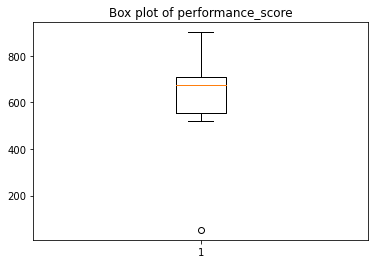

In [156]:
plt.boxplot(df['performance_score'])
plt.title('Box plot of performance_score')

In [157]:
# Plotted the box plot inorder to find the outliers(datapoints that are beyond lower bound(q1-1.5*IQR) and upper bound(Q3+1.5*IQR))

In [158]:
Q1 = np.percentile(df['performance_score'], 25, interpolation='midpoint')
print(Q1)
Q2 = np.percentile(df['performance_score'], 50, interpolation='midpoint')
print(Q2)
Q3 = np.percentile(df['performance_score'], 75, interpolation='midpoint')
print(Q3)

556.0
674.0
711.0


In [159]:
df['performance_score'].median()

674.0

In [160]:
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print('Lower limit :',lower_limit)
print('Upper limit :',upper_limit)

Lower limit : 323.5
Upper limit : 943.5


In [161]:
outlier=[]
for x in df['performance_score']:
    if (x>upper_limit) or (x<lower_limit):
        outlier.append(x)
print(outlier)

[53]


In [162]:
#Finding the index of outliers

indL = df['performance_score'] > upper_limit
df.loc[indL].index

Index([], dtype='object', name='name')

In [163]:
#Finding the index of outliers

indU = df['performance_score'] < lower_limit
df.loc[indU].index

Index(['James Authur'], dtype='object', name='name')

In [164]:
df.drop(['James Authur'], inplace=True)  #dropping the outlier

In [165]:
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


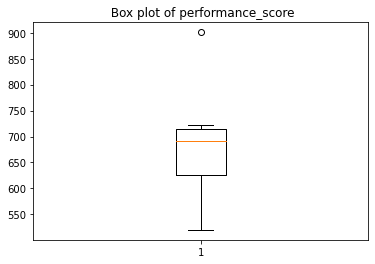

In [167]:
plt.boxplot(df['performance_score'])
plt.title(' Box plot of performance_score');

### 9.Check the gender column and do Dummy encoding.

In [168]:
df['gender']

name
Allen Smith      F
S Kumar          F
Jack Morgan      M
Ying Chin        F
Dheeraj Patel    F
Satyam Sharma    F
Josh Wills       F
Leo Duck         M
Name: gender, dtype: object

In [173]:
df_Dummy = pd.get_dummies(df['gender'])
df_Dummy

,F,M
name,,
Allen Smith,1,0
S Kumar,1,0
Jack Morgan,0,1
Ying Chin,1,0
Dheeraj Patel,1,0
Satyam Sharma,1,0
Josh Wills,1,0
Leo Duck,0,1


In [177]:
#Concatenating the original dataset with dummy variables.

dt=pd.concat([df, df_Dummy], axis=1)
dt

,age,income,gender,department,grade,performance_score,F,M
name,,,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723,1,0
S Kumar,45.0,16000.0,F,Finance,G0,520,1,0
Jack Morgan,32.0,35000.0,M,Finance,G2,674,0,1
Ying Chin,45.0,65000.0,F,Sales,G3,556,1,0
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711,1,0
Satyam Sharma,45.0,62000.0,F,Sales,G3,649,1,0
Josh Wills,54.0,52000.0,F,Finance,G3,901,1,0
Leo Duck,23.0,98000.0,M,Sales,G4,709,0,1


In [178]:
#Converted the categorical variable to numerical variable and dropped the column

### 10.Do the standard scaling on the feature performance score.

In [180]:
scaling = StandardScaler()

In [181]:
scaling.fit_transform(df[['performance_score']])

array([[ 0.39226224],
       [-1.47587231],
       [-0.05866679],
       [-1.14457751],
       [ 0.28183064],
       [-0.28873262],
       [ 2.03033096],
       [ 0.26342538]])

In [ ]:
#[ 0.39226224],[-1.47587231],[-0.05866679],[-1.14457751],[ 0.28183064],[-0.28873262],[ 2.03033096],[ 0.26342538]]) are the scaled values